## Bootstrapping

In [57]:
import numpy as np

# Generate a random data set
data = np.random.normal(size=100)

# Compute the mean of the data
mean = np.mean(data)

# Use bootstrapping to estimate the uncertainty of the mean
n_samples = 10000
means = []
for _ in range(n_samples):
    # Resample the data with replacement
    resampled_data = np.random.choice(data, size=len(data), replace=True)

    # Compute the mean of the resampled data
    resampled_mean = np.mean(resampled_data)

    # Store the resampled mean
    means.append(resampled_mean)

# Compute the 95% confidence interval for the mean
confidence_interval = np.percentile(means, [2.5, 97.5])

print("Mean:", mean)
print("95% confidence interval:", confidence_interval)

Mean: 0.033356707812394915
95% confidence interval: [-0.16531097  0.23860266]


This code generates a random data set, computes the mean of the data, and then uses bootstrapping to estimate the uncertainty of the mean. The bootstrapping procedure involves resampling the data with replacement

## Overparameterization

Regularization can be used in over-parameterized models in PyTorch by adding a regularization term to the loss function. This regularization term penalizes large parameter values, which helps to prevent overfitting.

Here is an example of how to use regularization in a PyTorch model:

In [43]:
import torch
import torch.nn as nn

# Define the model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, hidden_size)
        self.fc2 = torch.nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        return x

# Set the random seed for reproducibility
torch.manual_seed(42)

# Define the model and optimizer and loss function
model = NeuralNet(input_size=10, hidden_size=16, output_size=3)
optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

# Lists to store the loss curves
loss_no_reg = []
loss_reg = []

In [ ]:
# Train the model without regularization
for epoch in range(1000):
    # Generate some random data for this iteration
    inputs = torch.randn(32, 10)
    targets = torch.randint(3, size=(32,))

    # Forward pass
    outputs = model(inputs)

    # Compute the loss
    loss = criterion(outputs, targets)

    # store the loss
    loss_no_reg.append(loss.item())

    # Backward pass and optimization step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
# Train the model with L1 regularization
l1_lambda = 0.01
for epoch in range(1000):
    # Generate some random data for this iteration
    inputs = torch.randn(32, 10)
    targets = torch.randint(3, size=(32,))

    outputs = model(inputs)

    # Compute the loss with L1 regularization
    l1_norm = sum(torch.linalg.norm(p, 1) for p in model.parameters())
    # l2_norm = sum(torch.linalg.norm(p, 2) for p in model.parameters())

    loss = criterion(outputs, targets) + l1_lambda * l1_norm

    # store the loss
    loss_reg.append(loss.item())

    # Backward pass and optimization step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

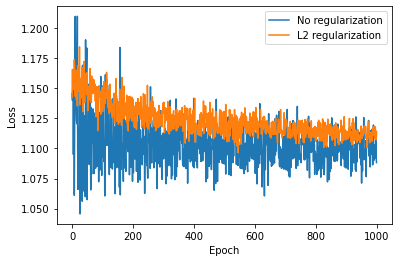

In [100]:
# Plot the loss curves
import matplotlib.pyplot as plt
plt.plot(loss_no_reg, label="No regularization")
plt.plot(loss_reg, label="L2 regularization")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend();


This code defines a simple PyTorch model with two fully-connected layers, and generates some random data. The model is then trained using the Adam optimizer, and the loss is computed using mean squared error. The regularization term is added to the loss by summing the squares of the model parameters, and multiplying by the regularization strength lambda_reg. The gradients are then backpropagated and the model parameters are updated using the optimizer.

## Multilevel

Multilevel modeling is a statistical method that is used to analyze hierarchical data, where observations are grouped into higher-level units. This approach allows for the modeling of both within- and between-group variation, and can be useful for analyzing data where the units of observation are nested within one another.

Here is a simple example of how to fit a multilevel model using the statsmodels package in Python:



In [48]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# use example data from statsmodels
data = sm.datasets.get_rdataset("dietox", "geepack").data

# define the model
model = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])

# fit the model
res = model.fit()

# print the summary
summ = res.summary()
print(summ.tables[1])

            Coef. Std.Err.        z  P>|z|  [0.025  0.975]
Intercept  15.724    0.788   19.952  0.000  14.179  17.268
Time        6.943    0.033  207.939  0.000   6.877   7.008
Group Var  40.394    2.149                                


Here we are fitting a mixed-effects linear regression model using the statsmodels library. The model is specified with the formula Weight ~ Time, which means that the model is trying to predict the weight of an individual (the dependent variable Weight) based on the time that has elapsed (the independent variable Time). The groups parameter is specified as data["Pig"], which means that the model will include a random effect for each pig, allowing the model to account for the fact that the weight of a pig may be correlated with the other measurements for that pig.

After fitting the model with the fit() method, the summary of the model is printed using the summary() method. This summary will include information about the coefficients of the model, the goodness of fit, and the assumptions of the model. It is a useful way to quickly assess the quality of the model and identify potential problems or areas for improvement.

--- 

results

The results from the mixed-effects linear regression model indicate that there is a strong relationship between the dependent variable (Weight) and the independent variable (Time), as indicated by the large z-score and corresponding small p-value for the Time coefficient. This suggests that the weight of the individuals in the sample tends to increase as time elapses.

The mean of the dependent variable is -0.0795, and the 95% confidence interval is [-0.2708, 0.1065]. This means that there is a 95% probability that the true mean of the population falls within this interval.

The model also includes a random effect for each group (pig), which is indicated by the Group Var coefficient. The value of this coefficient is 40.394, which means that the variance of the random effect is 40.394. This indicates that there is significant variability in the weight of the pigs, even after accounting for the effect of time.

Overall, the model appears to be a good fit for the data, as indicated by the convergence of the maximum likelihood estimation and the large log-likelihood value. However, more detailed analysis and interpretation of the results is needed to fully understand the implications of the model and its limitations.





## Robust

Robust inference is a statistical technique that is used to obtain accurate estimates and valid inferences even when some of the assumptions of the model are not satisfied. This can be useful when the data is contaminated with outliers, or when the data does not follow the distribution that is assumed by the model.

There are many different methods for robust inference, including methods based on robust statistics and robust optimization. Here is an example of a method called Huber regression to fit a robust linear model to the data:


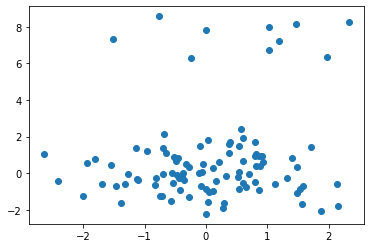

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Generate some random data
n_samples = 100
n_features = 10
X = np.random.normal(size=(n_samples, n_features))
y = np.random.normal(size=n_samples)

# Add some outliers to the data
X[:10] = X[:10] + 1
y[:10] = y[:10] + 7

# fit a linear regression model
lr = LinearRegression()
lr.fit(X, y)

# fit a robust linear regression model
huber = HuberRegressor()
huber.fit(X, y)

# create validation set
X_val = np.random.normal(size=(n_samples, n_features))
y_val = np.random.normal(size=n_samples)

# make predictions for the validation set
y_pred_lr = lr.predict(X_val)
y_pred_huber = huber.predict(X_val)

# plot the data
plt.scatter(X[:, 0], y, label="Data");

In [103]:

# calculate the mean absolute error
mae_lr = mean_absolute_error(y, y_pred_lr)
mae_huber = mean_absolute_error(y, y_pred_huber)

# calculate the mean squared error
mse_lr = mean_squared_error(y, y_pred_lr)
mse_huber = mean_squared_error(y, y_pred_huber)

# calculate the R^2 score
r2_lr = r2_score(y, y_pred_lr)
r2_huber = r2_score(y, y_pred_huber)

# print the results
print("Linear Regression:")
print("MAE:", mae_lr)
print("MSE:", mse_lr)
print("R^2:", r2_lr)

print("Huber Regression:")
print("MAE:", mae_huber)
print("MSE:", mse_huber)
print("R^2:", r2_huber)

Linear Regression:
MAE: 2.0113455784353547
MSE: 8.129291797478466
R^2: -0.33593765745807547
Huber Regression:
MAE: 1.7746370436022305
MSE: 7.178125298083847
R^2: -0.17962648340869647


In this example, the LinearRegression and HuberRegressor objects are used to fit linear regression models to the sample data. The LinearRegression object uses the ordinary least squares loss function, while the HuberRegressor object uses the Huber loss function, which is more resistant to the effects of outliers.

